# Importing libraries

In [ ]:
# 'https://hilpisch.com/tr_eikon_eod_data.csv'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-v0_8')
# print(plt.style.available)

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as sco

# 1 - Introduction

**Fixed income securities:** Investment securities that provide regular, predictable income (predictable interests rates and principal amount).

**Bond:** A type of fixed income security that represents a loan made by an investor to a borrower (government, corporation, minicipality).

**Key features of fixed income:**

(a) Fixed income investors are paid before the equity investor if the issuer face any financial distress;

(b) Securities have different lifespan;

(c) Investors receive periodic interest payment;

**Types of fixed income securities:**

(a) Government bonds (treasury bills 1m-1y, treasure notes 2y-10y, treasure bonds 10y-30y);

(b) Corporate bonds;

(c) Municipal bonds;

## 1.1 - Yield curve

A graph that shows the relationship between the yield (interest rate) of a bond and their maturities.

**Normal yield curve:** upward sloping yield curve. Long term bonds offer higher yield as compared to short term bonds. Appears in a health economy.

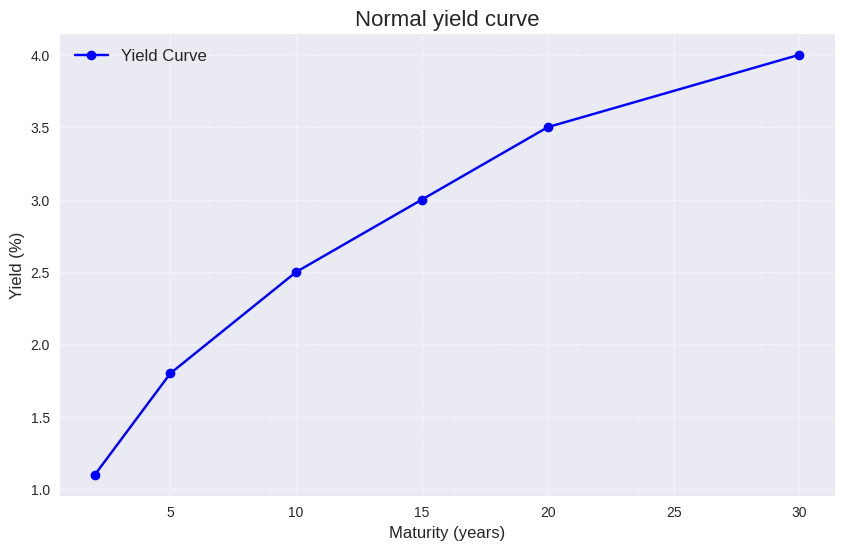

In [ ]:
# Example data for maturities (in years) and yields (in %)
maturities = [2, 5, 10, 15, 20, 30] # Years
yields = [1.1, 1.8, 2.5, 3, 3.5, 4]  # Yield years

# Plot the yield curve
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, marker='o', linestyle='-', color='blue', label='Yield Curve')

# Add titles and labels
plt.title('Normal yield curve', fontsize=16)
plt.xlabel('Maturity (years)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)

# Format the grid and add a legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12);

**Inverted yield curve:** Downward sloping yield curve. Short term bonds offer higher yield than long term bonds. Recession or economic slowdown is about to happen.

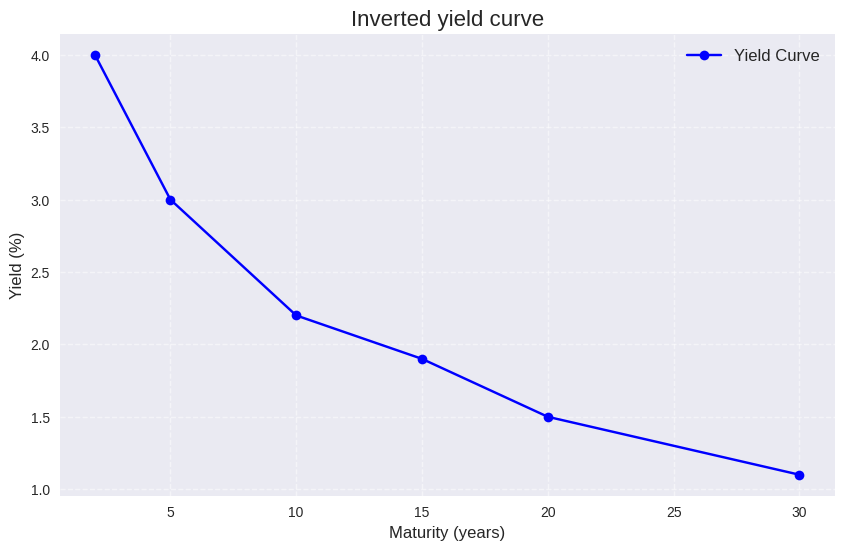

In [ ]:
maturities = [2, 5, 10, 15, 20, 30] # Years
yields = [4, 3, 2.2, 1.9, 1.5, 1.1]  # Yield years
# Plot the yield curve
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, marker='o', linestyle='-', color='blue', label='Yield Curve')
plt.title('Inverted yield curve', fontsize=16)
plt.xlabel('Maturity (years)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12);

**Flat yield curve:** It shows similar yields across all maturities.

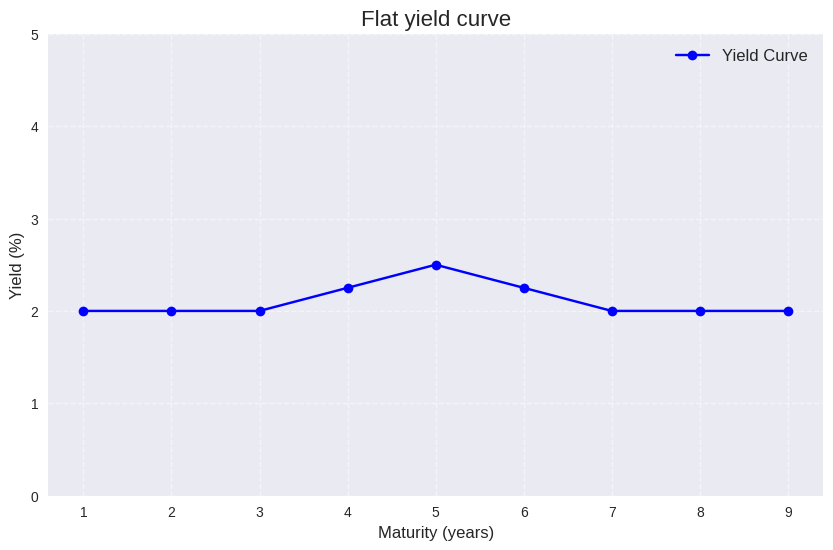

In [ ]:
maturities = [1, 2, 3, 4, 5, 6, 7, 8, 9] # Years
yields = [2, 2, 2, 2.25, 2.5, 2.25, 2, 2, 2]  # Yield years
# Plot the yield curve
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, marker='o', linestyle='-', color='blue', label='Yield Curve')
plt.title('Flat yield curve', fontsize=16)
plt.xlabel('Maturity (years)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 5)
plt.legend(fontsize=12);

# 2 - Nelson-Siegel model

The Nelson-Siegel (NS) model is used to define the shape of the yield curve. It is used to fit the yield curve. The NS model helps to accurately model the yield curve accross different maturities. It helps to find the yield on maturities that are not released by the government.

The formula for the yield curve is given by
\begin{align}
S(m) = \beta_0 + \beta_1 \bigg( \frac{1 - e^{-\lambda m}}{\lambda m}\bigg) + \beta_2 \bigg( \frac{1 - e^{-\lambda m}}{\lambda m} - e^{-\lambda m} \bigg) \,,
\end{align}

where $S(m)$ is the spot rate (rate observed in market) at maturity $m$, $\{ \beta_0, \beta_1, \beta_2\}$ are parameters of the model which are calibrated using the market data. In particular, $\beta_0$ represents the long-term level of the yield curve, $\beta_1$ is the short-term component of the yield curve and $\beta_2$ is the middle term component and captures the curvature (hump) is the middle of the curve. The parameter $\lambda$ is the decay factor, which encodes how quickly the slope and the curvature fade as we move along the curve.

## 2.1 - Imprementation

Since the government only provides a discrete set of interest rates and maturities, and we want to know an arbitrary interest rate for a given maturity, we can use the NS model to estimate to yield curve for a continuum of matirities and interests rates.

For the implementation below, we will consider the US treasury yield curve rates from 13/12/2024, which can be downloaded at https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2024.

In [ ]:
df_original = pd.read_csv('daily-treasury-rates.csv')
df0 = df_original.copy()

In [ ]:
df0.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/13/2024,4.43,4.43,4.34,4.36,4.32,4.24,4.25,4.21,4.25,4.33,4.40,4.69,4.61
1,12/12/2024,4.43,4.44,4.35,4.36,4.31,4.22,4.18,4.14,4.18,4.25,4.32,4.62,4.55
2,12/11/2024,4.49,4.45,4.38,4.38,4.32,4.21,4.15,4.09,4.13,4.20,4.26,4.55,4.48
3,12/10/2024,4.53,4.48,4.41,4.42,4.35,4.22,4.15,4.08,4.09,4.15,4.22,4.49,4.41
4,12/09/2024,4.56,4.50,4.42,4.43,4.34,4.20,4.13,4.09,4.07,4.13,4.20,4.47,4.39


In [ ]:
df1 = df0[df0['Date'] == '12/13/2024']

In [ ]:
df1.drop(columns=['Date'], inplace=True)

<ipython-input-9-7ac08b941374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Date'], inplace=True)


In [ ]:
df2 = df1.T
df2.reset_index(inplace=True)
index_to_name_map = {0: 'Maturity', 1: 'Yield (%)'}
df2.columns = [index_to_name_map.get(i, col) for i, col in enumerate(df2.columns)]

In [ ]:
df2

,Maturity,Yield (%)
0,1 Mo,4.43
1,2 Mo,4.43
2,3 Mo,4.34
3,4 Mo,4.36
4,6 Mo,4.32
5,1 Yr,4.24
6,2 Yr,4.25
7,3 Yr,4.21
8,5 Yr,4.25
9,7 Yr,4.33


In [ ]:
mats = df2['Maturity'].values.tolist()
yields = round((df2['Yield (%)']/100),3).values.tolist()

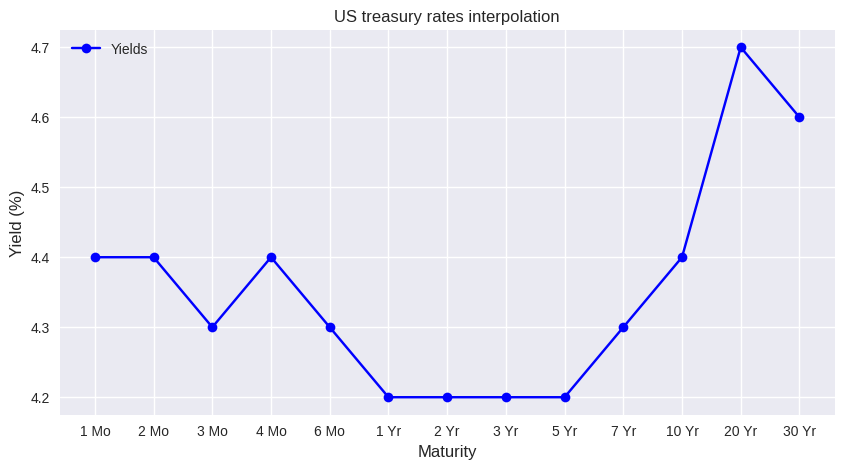

In [ ]:
yields2 = [x * 100 for x in yields]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mats, yields2, marker="o", c="blue", label='Yields')
ax.set_xlabel('Maturity', fontsize=12)
ax.set_ylabel('Yield (%)', fontsize=12)
ax.set_title("US treasury rates interpolation", fontsize=12)
ax.legend(loc='upper left');

Let us now define the Nelson-Siegel function.

In [ ]:
def nelson_siegel(b0, b1, b2, la, m):
  term1 = ((1 - np.exp(-la * m))/(la * m))
  term2 = term1 - np.exp(-la * m)
  return b0 + b1 * term1 + b2 * term2

Let us plot the function to see.

<ipython-input-14-f6577292e706>:2: RuntimeWarning: invalid value encountered in divide
  term1 = ((1 - np.exp(-la * m))/(la * m))


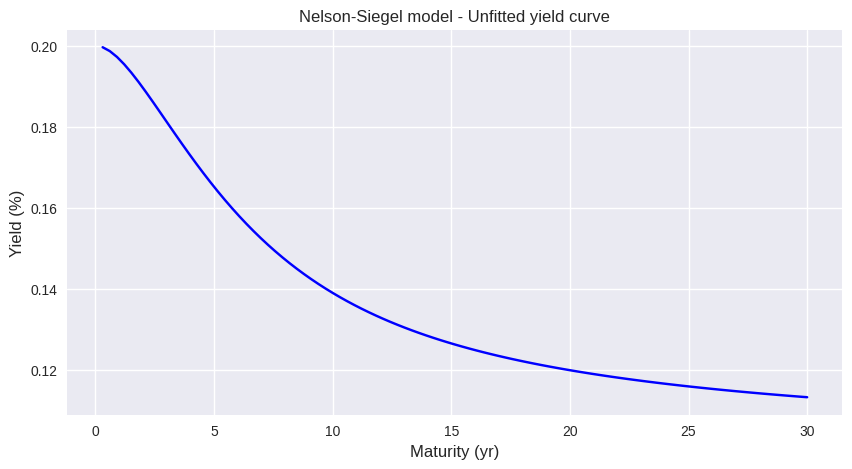

In [ ]:
m = np.linspace(0, 30, 100)
b0 = 0.1
b1 = 0.1
b2 = 0.1
la = 0.5
ns = nelson_siegel(b0, b1, b2, la, m)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(m, ns, c="blue")
ax.set_xlabel('Maturity (yr)', fontsize=12)
ax.set_ylabel('Yield (%)', fontsize=12)
ax.set_title("Nelson-Siegel model - Unfitted yield curve", fontsize=12);

And the optimizer function and the objective function, i.e., the one that needs to me minimized.

In [ ]:
def optimizer(y, m):
  # print('{:>14} {:>14} {:>14} {:>14} {:>14}'.format('b0', 'b1', 'b2', 'la', 'sum_of_squares'))
  print(74 * "-")
  def objective(x, yield_gov, maturity):
    ns = nelson_siegel(x[0], x[1], x[2], x[3], maturity)
    sum_of_squares = np.sum((yield_gov - ns)**2)
    # print('{:14.6f} {:14.6f} {:14.6f} {:14.6f}' '{:14.10f}'.format(x[0], x[1], x[2], x[3], sum_of_squares))
    return sum_of_squares
  x = [0.1, 0.1, 0.1, 1]
  res = sco.minimize(objective, x, args=(y, m), method='BFGS')
  return res.x

In [ ]:
y = yields
m = np.array([1, 2, 3, 4, 6,12, 24, 36, 60, 84, 120, 240 ,360 ])/12
result = optimizer(y , m)
print("[b0, b1, b2, la]=", [result[0].round(3), result[1].round(3), result[2].round(3), result[3].round(3)])

--------------------------------------------------------------------------
[b0, b1, b2, la]= [0.048, -0.004, -0.015, 0.46]


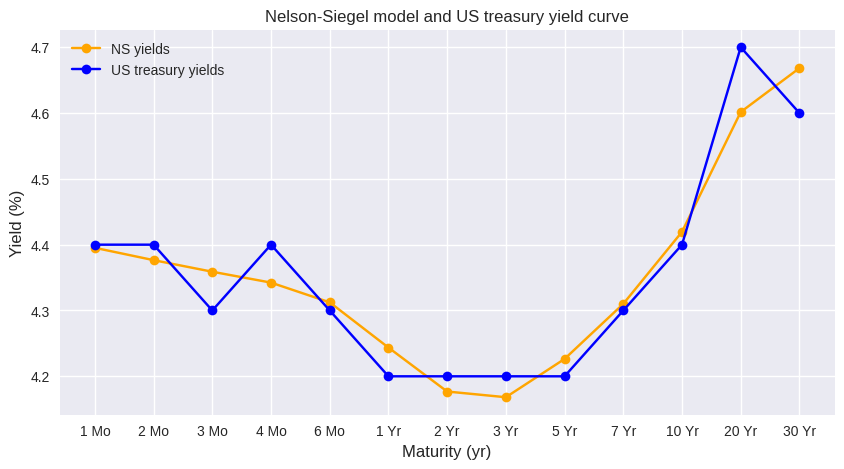

In [ ]:
ns_params = result.tolist()
yields_ns = nelson_siegel(ns_params[0], ns_params[1], ns_params[2], ns_params[3], m)
yields_ns2 = [x * 100 for x in yields_ns]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mats, yields_ns2, marker="o", c="orange", label='NS yields')
ax.plot(mats, yields2, marker="o", c="blue", label='US treasury yields')
ax.set_xlabel('Maturity (yr)', fontsize=12)
ax.set_ylabel('Yield (%)', fontsize=12)
ax.set_title("Nelson-Siegel model and US treasury yield curve", fontsize=12)
ax.legend(loc='upper left');

# 3 - Nelson-Siegel-Svenssons model

The NSS model is an extension of the NS model and is used in finance to model the yield curve.

Why extend the NS model? The NS model could only capture a single hump in the yield curve, so that the NS model struggled to capture complex shapes of the yield curve. Therefore, it provides a more smooth and precise representation of the yield curve.

The formula for the yield curve in the NSS model is
\begin{align}
S(m) = \beta_0 + \beta_1 \bigg( \frac{1 - e^{-\lambda_1 m}}{\lambda_1 m}\bigg) + \beta_2 \bigg( \frac{1 - e^{-\lambda_1 m}}{\lambda_1 m} - e^{-\lambda_1 m} \bigg) + \beta_3 \bigg( \frac{1 - e^{-\lambda_2 m}}{\lambda_2 m} - e^{-\lambda_2 m} \bigg) \,,
\end{align}
where $\beta_0$ represents the long-term yield, $\beta_1$ captures the steepness of short term maturity, and $\{\beta_2, \beta_3\}$ captures the hump/deel of medium term maturities. The parametes $\{\lambda_1, \lambda_2\}$ represent the decay factors and, of course, both need to be positive for consistency. They control how quickly the curvature effect of $\{\beta_1, \beta_2 \}$ will fade along the curve.

Let us now comment on some limitations of the NSS model. There is risk of overfitting, since it has more parameters to fit. In this model there are six parameters, instead of four as in the NS model, which means that optimization os more computationally demanding.

In what follows, we implement the NSS model as we did with the NS model above.

In [ ]:
def nelson_siegel_svensson(b0, b1, b2, la1, b3, la2, m):
  term1 = ((1 - np.exp(-la1 * m))/(la1 * m))
  term2 = term1 - np.exp(-la1 * m)
  term3 = ((1 - np.exp(-la2 * m))/(la2 * m)) - np.exp(-la2 * m)
  return b0 + b1 * term1 + b2 * term2 + b3 * term3

In [ ]:
def optimizer(y, m):
  # print('{:>14} {:>14} {:>14} {:>14} {:>14} {:>14} {:>14}'.format('b0', 'b1', 'b2', 'la1', 'b3', 'la2', 'sum_of_squares'))
  print(104 * "-")
  def objective(x, yield_gov, maturity):
    ns = nelson_siegel_svensson(x[0], x[1], x[2], x[3], x[4], x[5], maturity)
    sum_of_squares = np.sum((yield_gov - ns)**2)
    # print('{:14.6f} {:14.6f} {:14.6f} {:14.6f} {:14.6f} {:14.6f} {:14.10f}'.format(x[0], x[1], x[2], x[3], x[4], x[5], sum_of_squares))
    return sum_of_squares
  x = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
  res = sco.minimize(objective, x, args=(y, m), method='BFGS')
  return res.x

In [ ]:
y = yields
m = np.array([1, 2, 3, 4, 6,12, 24, 36, 60, 84, 120, 240 ,360 ])/12
result_nss = optimizer(y , m)
print("[b0, b1, b2, la1, b3, la2]=", [result_nss[0].round(3), result_nss[1].round(3), result_nss[2].round(3), result_nss[3].round(3), result_nss[4].round(3), result_nss[5].round(3)])

--------------------------------------------------------------------------------------------------------
[b0, b1, b2, la1, b3, la2]= [0.021, 0.023, -0.018, 0.236, 0.085, 0.077]


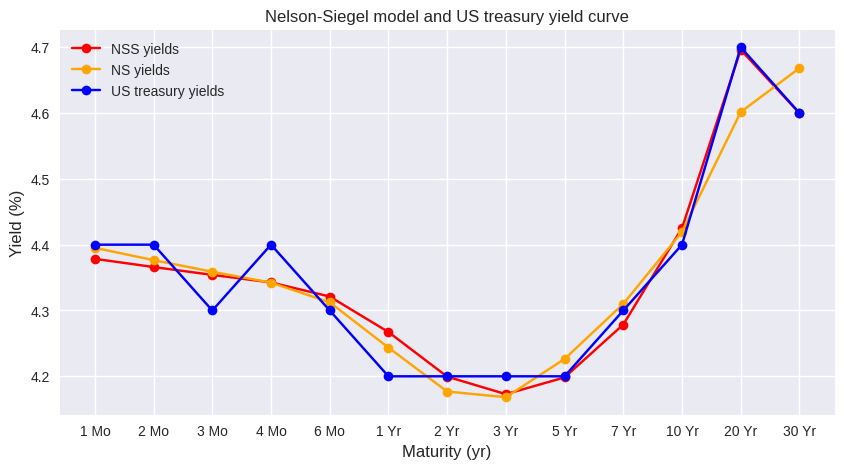

In [ ]:
ns_params = result.tolist()
nss_params = result_nss.tolist()
yields_nss = nelson_siegel_svensson(nss_params[0], nss_params[1], nss_params[2], nss_params[3], nss_params[4], nss_params[5], m)
yields_nss2 = [x * 100 for x in yields_nss]
yields_ns = nelson_siegel(ns_params[0], ns_params[1], ns_params[2], ns_params[3], m)
yields_ns2 = [x * 100 for x in yields_ns]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mats, yields_nss2, marker="o", c="red", label='NSS yields')
ax.plot(mats, yields_ns2, marker="o", c="orange", label='NS yields')
ax.plot(mats, yields2, marker="o", c="blue", label='US treasury yields')
ax.set_xlabel('Maturity (yr)', fontsize=12)
ax.set_ylabel('Yield (%)', fontsize=12)
ax.set_title("Nelson-Siegel model and US treasury yield curve", fontsize=12)
ax.legend(loc='upper left');

Note that we are not plotting the complete functions of the NS and NSS models, but we are only plotting a specific number of points corresponding to the maturities we have. Of course, if the NS and NSS functions were plotted the curve would be a lot mode smooth.

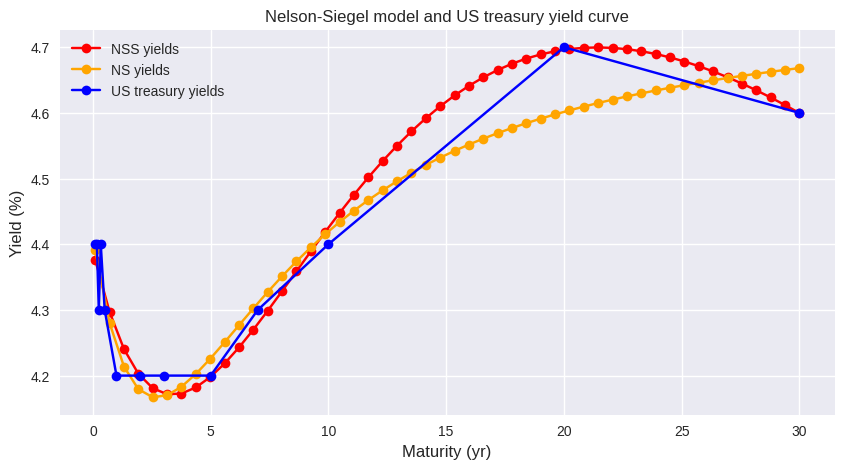

In [ ]:
m_new = np.linspace(0.1, 30, 50)
yields_nss = nelson_siegel_svensson(nss_params[0], nss_params[1], nss_params[2], nss_params[3], nss_params[4], nss_params[5], m_new)
yields_nss2 = [x * 100 for x in yields_nss]
yields_ns = nelson_siegel(ns_params[0], ns_params[1], ns_params[2], ns_params[3], m_new)
yields_ns2 = [x * 100 for x in yields_ns]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(m_new, yields_nss2, marker="o", c="red", label='NSS yields')
ax.plot(m_new, yields_ns2, marker="o", c="orange", label='NS yields')
ax.plot(m, yields2, marker="o", c="blue", label='US treasury yields')
ax.set_xlabel('Maturity (yr)', fontsize=12)
ax.set_ylabel('Yield (%)', fontsize=12)
ax.set_title("Nelson-Siegel model and US treasury yield curve", fontsize=12)
ax.legend(loc='upper left');